## Loan Application Status Prediction Problem Statement: 
This dataset includes details of applicants who have applied for loan.The dataset includes details like credit history, loan amount, their income, dependents etc. 

#### Independent Variables: 
- Loan_ID
  
-  Gender
    
-  Married
    
-  Dependents
    
-  Education
    
- Self_Employed
    
-  ApplicantIncome
    
-  CoapplicantIncome
    
-  Loan_Amount
    
-  Loan_Amount_Term
    
-  Credit History
    
-  Property_Area
    
#### Dependent Variable (Target Variable):
-  Loan_Status
    
You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

In [1]:
 # Importing important libraries 
import numpy as np
import pandas as pd

#For data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [2]:
# reading Data
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head() #show first 5 rows

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
#checking shape of the data
df.shape

(614, 13)

In [5]:
# checking Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
#checking null values
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are some missing values in data

In [7]:
df['Loan_Amount_Term'].nunique()

10

In [8]:
df['Dependents'].nunique()

4

In [9]:
df['LoanAmount'].nunique()

203

In [10]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [11]:
columns=['Loan_Amount_Term',"Dependents",'Credit_History','Gender','Married','Self_Employed']

In [12]:
# filling above columns null values with mode
for col in columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [13]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [14]:
##Filling LoanAmount with mean values
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [16]:
# dropping unnecessary columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [17]:
df.shape

(614, 12)

In [18]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


We can see there is big difference between 75% and max , means there must be outliers in data

## EDA

## 1. Univariate Analysis

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

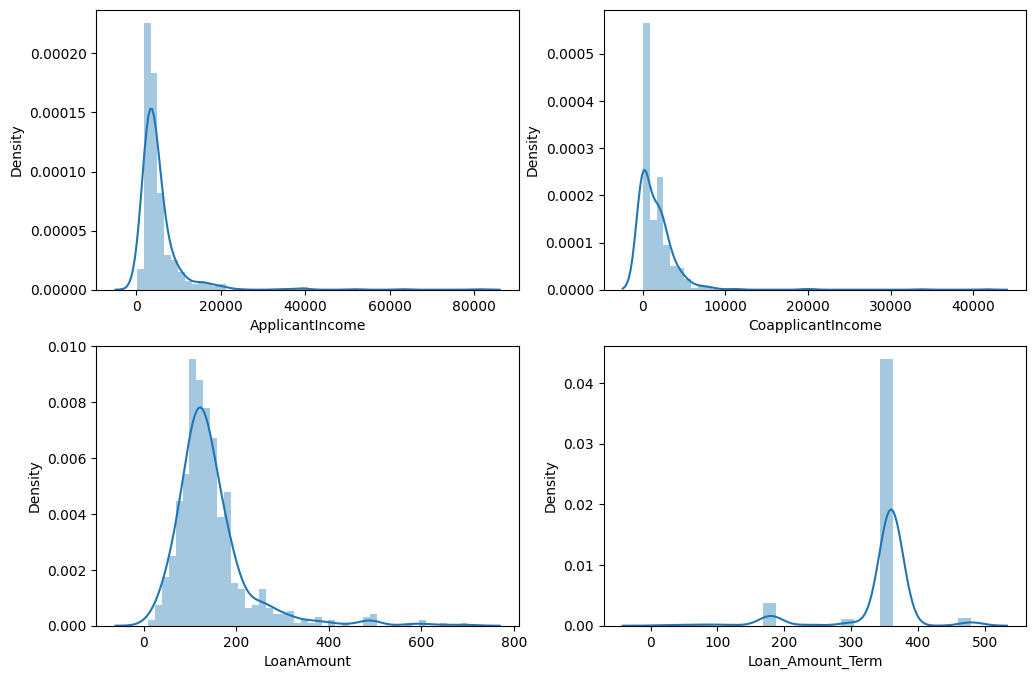

In [19]:
# Dist Plot for Continous Variables
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
sns.distplot(df['ApplicantIncome'], ax=axs[0, 0])
sns.distplot(df['CoapplicantIncome'], ax=axs[0, 1])
sns.distplot(df['LoanAmount'], ax=axs[1, 0])
sns.distplot(df['Loan_Amount_Term'], ax=axs[1, 1])

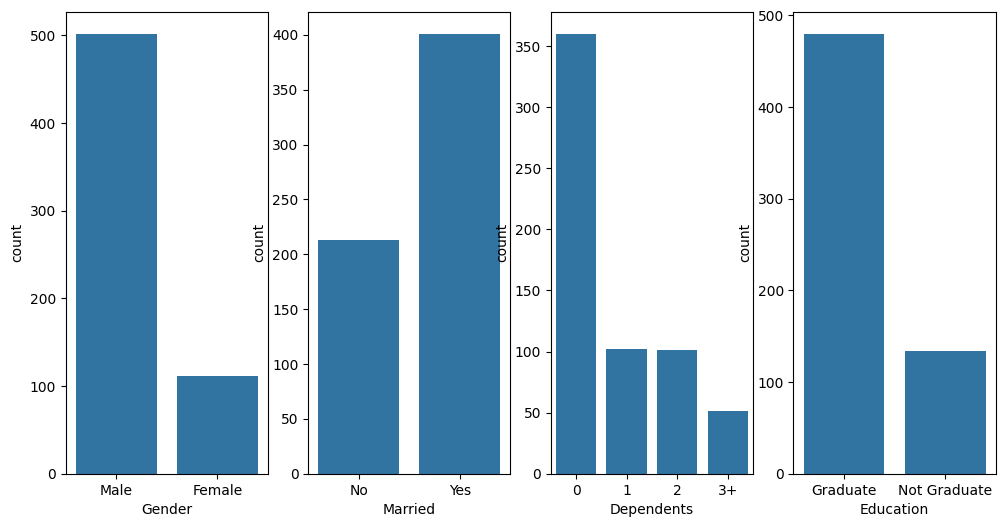

In [20]:
# Bar Plot for Categorical Variables
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
sns.countplot(x='Gender', data=df, ax=axs[0])
sns.countplot(x='Married', data=df, ax=axs[1])
sns.countplot(x='Dependents', data=df, ax=axs[2])
sns.countplot(x='Education', data=df, ax=axs[3])
plt.show()

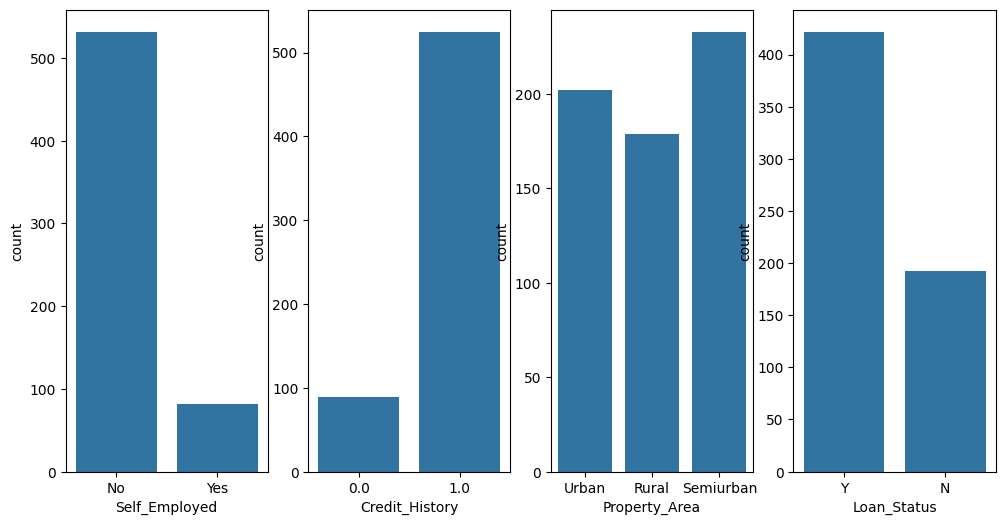

In [21]:
fig, axs = plt.subplots(1, 4, figsize=(12, 6))
sns.countplot(x='Self_Employed', data=df, ax=axs[0])
sns.countplot(x='Credit_History', data=df, ax=axs[1])
sns.countplot(x='Property_Area', data=df, ax=axs[2])
sns.countplot(x='Loan_Status', data=df, ax=axs[3])
plt.show()

## 2. Bivariate Analysis

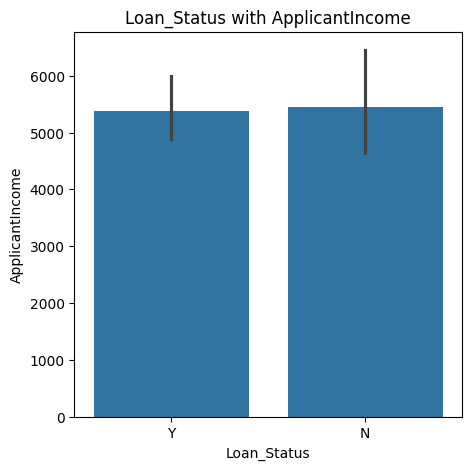

In [22]:
plt.figure(figsize=(5,5))
sns.barplot(y='ApplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with ApplicantIncome")
plt.show()


Chances are equal it doesn't matter with ApplicantIncome

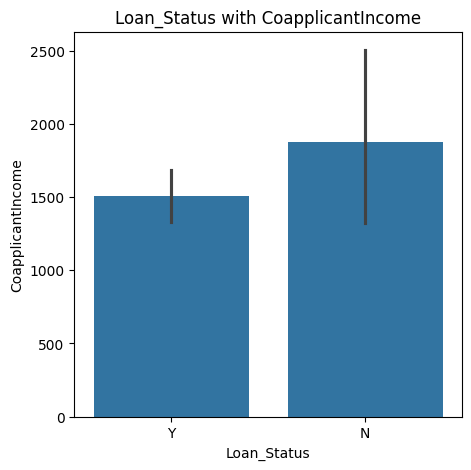

In [23]:
plt.figure(figsize=(5,5))
sns.barplot(y='CoapplicantIncome',x='Loan_Status',data=df)
plt.title("Loan_Status with CoapplicantIncome")
plt.show()

Here we notice some interesting figure there are chances not to be approved donts matter if CoapplicantIncome is high might be thats depends on all other figutres

<Axes: xlabel='Property_Area', ylabel='count'>

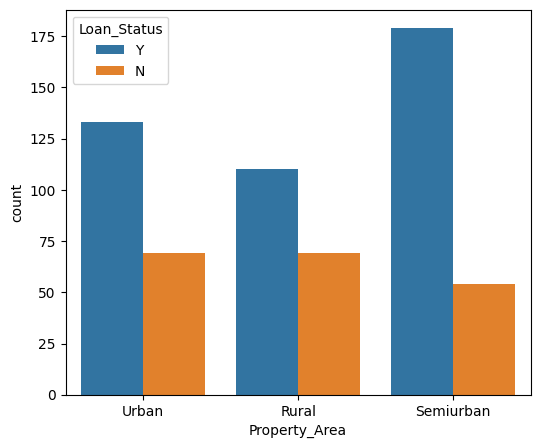

In [24]:
plt.figure(figsize=(6,5))
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

People those are from Urban area having 50-50 chances of approval depends and other parameters as well

In RuralProperty_area not approval chances are increasing

In Semiurban area there are high chances to get approval

<Axes: xlabel='Credit_History', ylabel='count'>

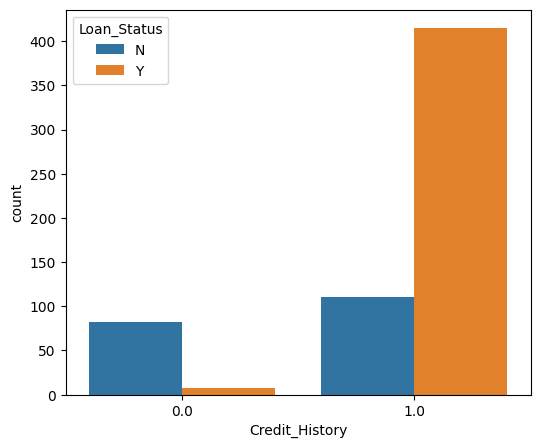

In [25]:
plt.figure(figsize=(6,5))
sns.countplot(x='Credit_History',hue='Loan_Status',data=df)

Here we have the logical figure most of the people those are not getting approval, not having credit hsitory

the people those having credit history, most of them getting approval

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

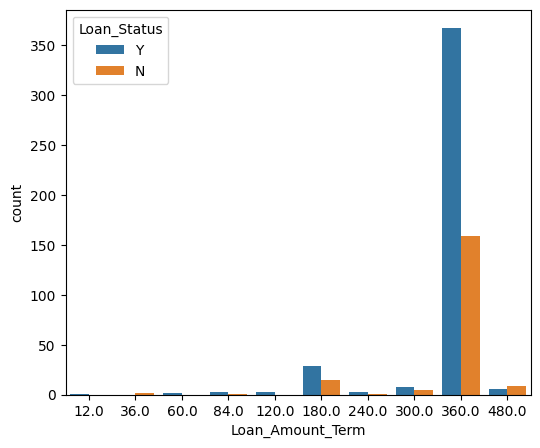

In [26]:
plt.figure(figsize=(6,5))
sns.countplot(x='Loan_Amount_Term',hue='Loan_Status',data=df)

Most of the people who applied for loan asked for 360 months of term more half are getting approved

People those are taking loan for 480 months, most of them are not getting approval

<Axes: xlabel='Self_Employed', ylabel='count'>

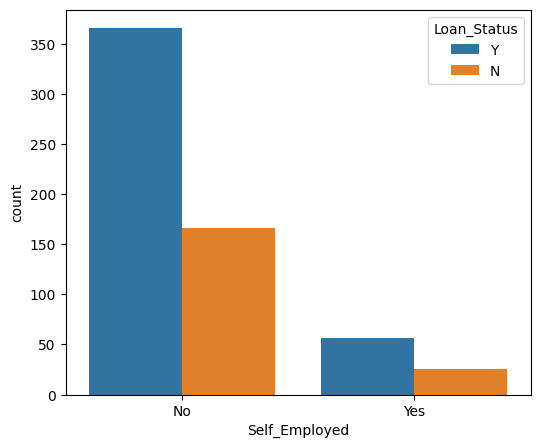

In [27]:
plt.figure(figsize=(6,5))
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

In self_employed we see there around 50% of diffrence between approved and not approved people

<Axes: xlabel='Education', ylabel='count'>

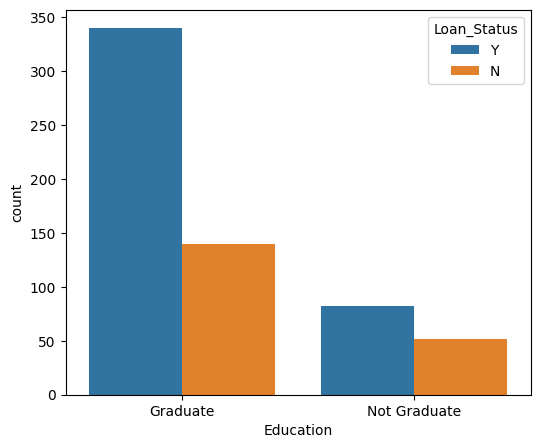

In [28]:
plt.figure(figsize=(6,5))
sns.countplot(x='Education',hue='Loan_Status',data=df)

In Graduate categ. we have around 350 approved loan and around 150 not approved

<Axes: xlabel='Dependents', ylabel='count'>

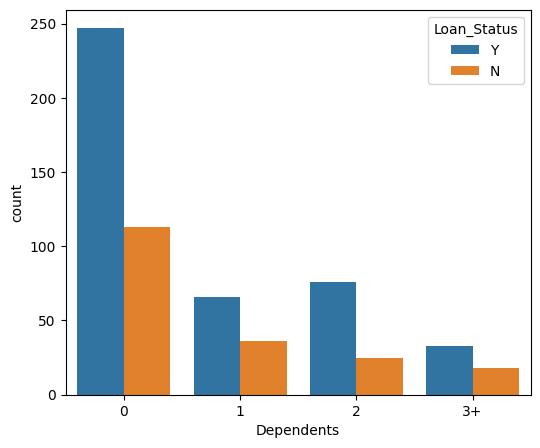

In [29]:
plt.figure(figsize=(6,5))
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

We can notice people those are not having dependents are getting chances of Loan approval

when dependents numbers are 3+ there is less chances of approval

## Using LabelEncoder for convering categorical to numerical

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int64
 6   CoapplicantIncome  614 non-null    int64
 7   LoanAmount         614 non-null    int64
 8   Loan_Amount_Term   614 non-null    int64
 9   Credit_History     614 non-null    int64
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(7), int64(5)
memory usage: 40.9 KB


All columns are converted into numerical now

## Skewness handling

In [33]:
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      0.040993
CoapplicantIncome    0.780870
LoanAmount           0.458715
Loan_Amount_Term    -3.316702
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

skewness more than+/- 0.5 will we treated

object and Target column will no be treated

we can see here most of the columns are skewed,CoapplicantIncome

In [34]:
from sklearn.preprocessing import power_transform

df[['CoapplicantIncome']]=power_transform(df[['CoapplicantIncome']],method='yeo-johnson')

## Checking outliers

<Axes: ylabel='CoapplicantIncome'>

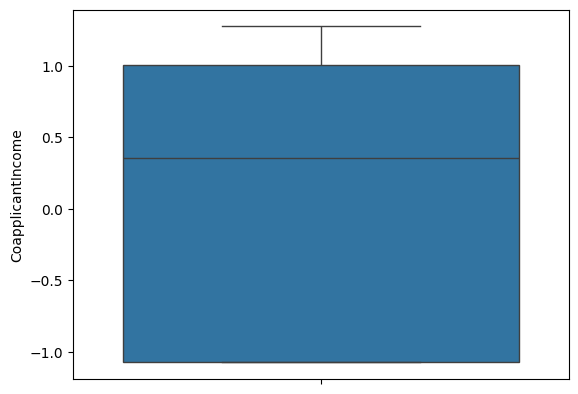

In [35]:
sns.boxplot(df['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

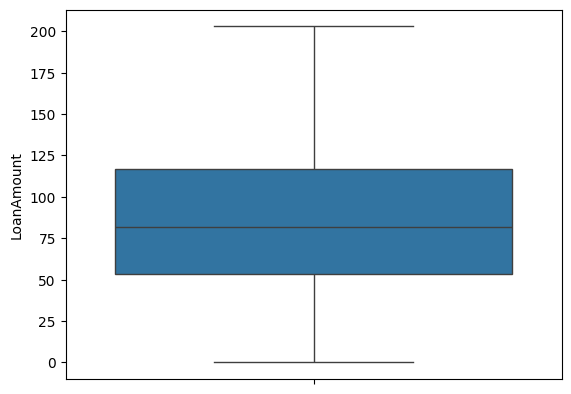

In [36]:
sns.boxplot(df['LoanAmount'])

<Axes: ylabel='Loan_Amount_Term'>

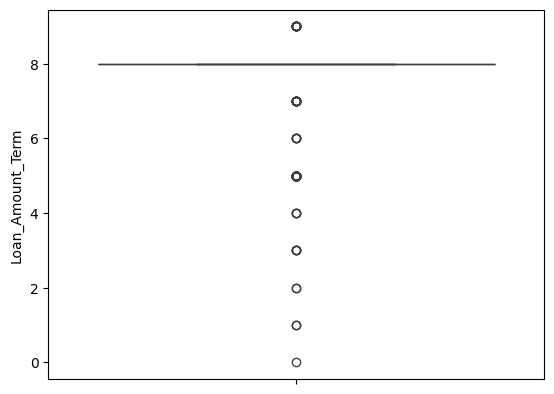

In [37]:
sns.boxplot(df['Loan_Amount_Term'])

<Axes: ylabel='Credit_History'>

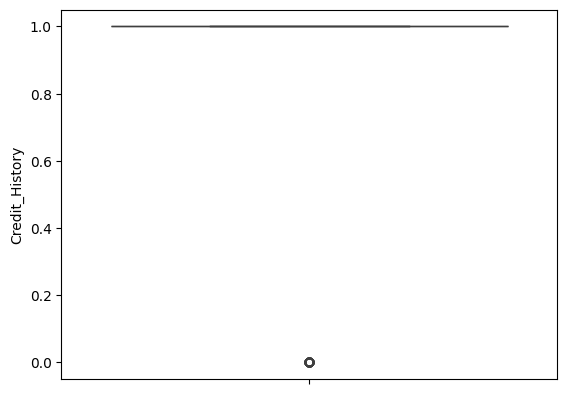

In [38]:
sns.boxplot(df['Credit_History'])

## Outliers removal using z score

In [39]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(np.where(z>3))

(array([ 14,  68,  94, 133, 242, 262, 313, 495, 497, 546, 575, 585],
      dtype=int64), array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))


In [40]:
df_1=df[(z<3).all(axis=1)]
print("with outliers::",df.shape)
print("After removing outliers::",df_1.shape)

with outliers:: (614, 12)
After removing outliers:: (602, 12)


<Axes: >

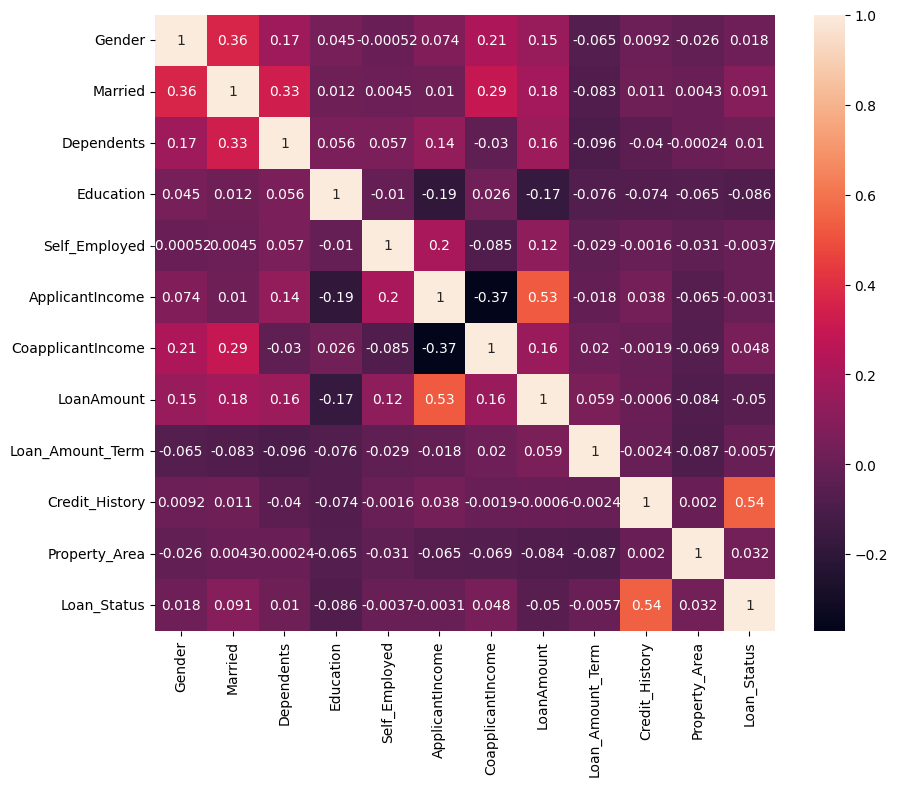

In [41]:
# draw correlation plot
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

## Split the data

In [42]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [43]:
X.shape

(614, 11)

In [44]:
y.shape

(614,)

## Scaling X values

In [45]:
from sklearn.preprocessing import MinMaxScaler

sc=MinMaxScaler()
x=sc.fit_transform(X)

In [46]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [47]:
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.248100,0.218241,0.133550,0.490312,0.456480,0.432118,0.851972,0.855049,0.518730
std,0.386497,0.476373,0.336541,0.413389,0.340446,0.284797,0.425818,0.224976,0.123247,0.352339,0.393741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.238591,0.000000,0.262315,0.888889,1.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.485119,0.608260,0.403941,0.888889,1.000000,0.500000
75%,1.000000,1.000000,0.333333,0.000000,0.000000,0.733631,0.883545,0.575123,0.888889,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Imbalanced learn
Using OverSamling_BorderlineSMOTE

<Axes: xlabel='Loan_Status', ylabel='count'>

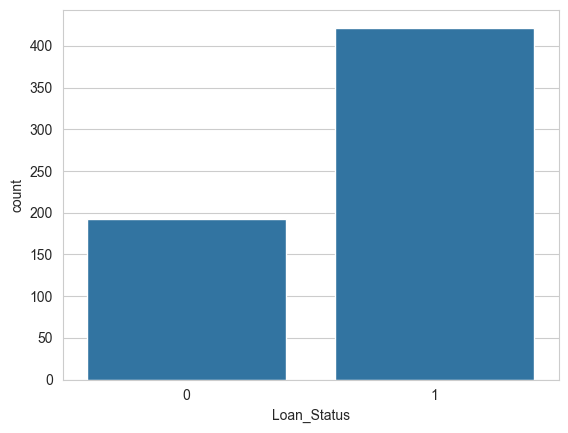

In [48]:
sns.set_style("whitegrid")
sns.countplot(x="Loan_Status", data=df)

We can see here Data is not fully balance but we'll treat the imbalace.

we have around 200 in yes and around 400 in no



In [49]:
from imblearn.over_sampling import BorderlineSMOTE
x_rus, y_rus =BorderlineSMOTE().fit_resample(x, y)
print('original  Target dataset shape:',y.shape)
print('Resample Target dataset shape',y_rus.shape)

original  Target dataset shape: (614,)
Resample Target dataset shape (844,)


## Spliting Train and Test data

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_rus,y_rus,test_size=.27,random_state=42)

In [51]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((616, 11), (228, 11), (616,), (228,))

## Model Building

In [52]:
#Importing necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')


## Logistic Regression

In [53]:
logreg=LogisticRegression()
logreg_score=cross_val_score(logreg,x_rus,y_rus,cv=4,scoring='accuracy')
print("cross validation score:",np.mean(logreg_score))

cross validation score: 0.6232227488151658


In [54]:
logreg.fit(x_train,y_train)
LR_predicted=logreg.predict(x_test)

print(accuracy_score(y_test,LR_predicted))
print(confusion_matrix(y_test,LR_predicted))
print(classification_report(y_test,LR_predicted))
print("Training accuracy::",logreg.score(x_train,y_train))
print("Test accuracy::",logreg.score(x_test,y_test))

0.631578947368421
[[61 62]
 [22 83]]
              precision    recall  f1-score   support

           0       0.73      0.50      0.59       123
           1       0.57      0.79      0.66       105

    accuracy                           0.63       228
   macro avg       0.65      0.64      0.63       228
weighted avg       0.66      0.63      0.63       228

Training accuracy:: 0.6428571428571429
Test accuracy:: 0.631578947368421


## Decision Tree Classifier

In [55]:
dtc=DecisionTreeClassifier()
dtc_score=cross_val_score(dtc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score:",np.mean(dtc_score))

cross validation score: 0.7417230205691745


In [56]:
dtc.fit(x_train,y_train)
predicted_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,predicted_dtc))
print(confusion_matrix(y_test,predicted_dtc))
print(classification_report(y_test,predicted_dtc))
print("Training accuracy::",dtc.score(x_train,y_train))
print("Test accuracy::",dtc.score(x_test,y_test))

0.706140350877193
[[85 38]
 [29 76]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       123
           1       0.67      0.72      0.69       105

    accuracy                           0.71       228
   macro avg       0.71      0.71      0.71       228
weighted avg       0.71      0.71      0.71       228

Training accuracy:: 1.0
Test accuracy:: 0.706140350877193


## K Nearest Neighbour Classifier

In [57]:
knn=KNeighborsClassifier()
knn_score=cross_val_score(knn,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for knn:",np.mean(knn_score))

cross validation score for knn: 0.7167652859960552


In [58]:
knn.fit(x_train,y_train)
predicted_knn=knn.predict(x_test)
print(accuracy_score(y_test,predicted_knn))
print(confusion_matrix(y_test,predicted_knn))
print(classification_report(y_test,predicted_knn))
print("Training accuracy::",knn.score(x_train,y_train))
print("Test accuracy::",knn.score(x_test,y_test))

0.6973684210526315
[[97 26]
 [43 62]]
              precision    recall  f1-score   support

           0       0.69      0.79      0.74       123
           1       0.70      0.59      0.64       105

    accuracy                           0.70       228
   macro avg       0.70      0.69      0.69       228
weighted avg       0.70      0.70      0.69       228

Training accuracy:: 0.8311688311688312
Test accuracy:: 0.6973684210526315


## Random Forest Classifier

In [59]:
rfc=RandomForestClassifier()
rfc_score=cross_val_score(rfc,x_rus,y_rus,cv=5,scoring='accuracy')
print("cross validation score for rfc:",np.mean(rfc_score))

cross validation score for rfc: 0.8317695125387432


In [60]:
rfc.fit(x_train,y_train)
predicted_rfc=rfc.predict(x_test)
print(accuracy_score(y_test,predicted_rfc))
print(confusion_matrix(y_test,predicted_rfc))
print(classification_report(y_test,predicted_rfc))
print("Training accuracy::",rfc.score(x_train,y_train))
print("Test accuracy::",rfc.score(x_test,y_test))

0.7587719298245614
[[94 29]
 [26 79]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       123
           1       0.73      0.75      0.74       105

    accuracy                           0.76       228
   macro avg       0.76      0.76      0.76       228
weighted avg       0.76      0.76      0.76       228

Training accuracy:: 1.0
Test accuracy:: 0.7587719298245614


## Lets perform Hyperparameter Tuning on the best model, which is Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# GridSearchCV to tune hyperparameters (set verbose=0 to suppress detailed output)
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# Fit GridSearchCV
grid_search_rf.fit(x_train, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {grid_search_rf.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.4f}')

# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
test_accuracy = accuracy_score(y_test, best_rf_model.predict(x_test))
print(f'Test Accuracy of the Best Random Forest Model: {test_accuracy:.4f}')

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8133
Test Accuracy of the Best Random Forest Model: 0.7939


## Plot ROC Curve

In [62]:
from sklearn.metrics import roc_auc_score

In [63]:
print("roc auc score::",roc_auc_score(y_test,best_rf_model.predict(x_test) ))

roc auc score:: 0.7943089430894309


In [64]:
from sklearn.metrics import roc_curve

In [65]:
fpr1, tpr1, thresh1 = roc_curve(y_test,best_rf_model.predict(x_test) , pos_label=1)

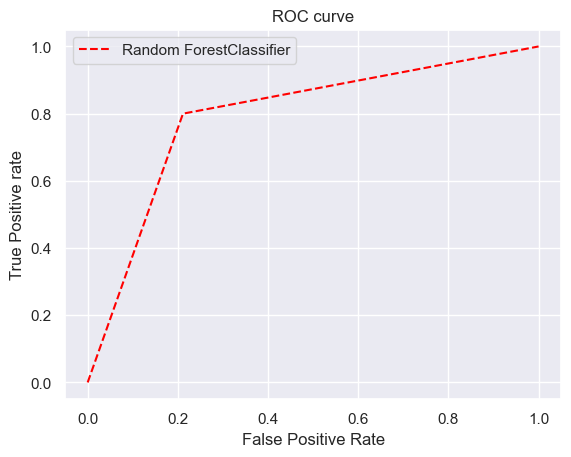

In [66]:
#plotting ROC CURVE
sns.set_theme(style="darkgrid")
plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Random ForestClassifier')

plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Saving Model:

In [67]:
import pickle
#Save the model using pickle
model =  RandomForestClassifier
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)